# Part I - Report on bike-sharing system in SF Bay area for February, 2019
## by Abdulafiz Musa

## Introduction
> This data set includes information about a bike-sharing system in greater San Francisco Bay area. It includes daily individual rides that occurred in the  month of February, 2019.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#check content of dataframe
bss = pd.read_csv('201902-fordgobike-tripdata.csv')
bss.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
#check structure of dataframe
bss.shape

(183412, 16)

In [4]:
#check datatypes and available information
bss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
bss.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> 184312 rows, 16 columns

### What is/are the main feature(s) of interest in your dataset?

> duration_sec, start_station_name, end_station_name, user_type, member_birth_year, member_gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration could give insight on the distance between destinations frequently used. The user_type, member_birth_year, member_gender can give basic information as to groups of individuals users that dominate this bike sharing system.

## Univariate Exploration



> **Distribution of time spent for each rides** What is the distribution of amount of time spent by each user from their starting point to destination?

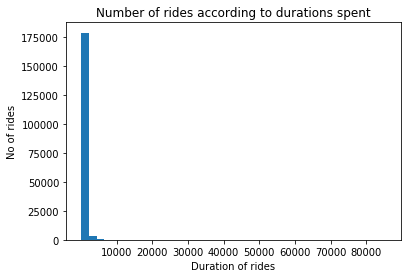

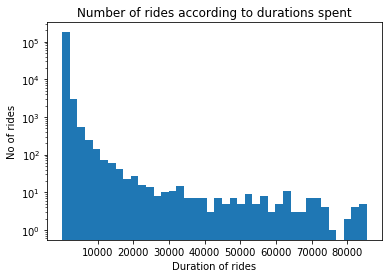

In [6]:
def plotFunc(plt):
    plt.xticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000])
    plt.title('Number of rides according to durations spent')
    plt.xlabel('Duration of rides')
    plt.ylabel('No of rides')
    plt.show()

plt.hist(data = bss, x = 'duration_sec', bins = 40)
plotFunc(plt)
#log scaling
plt.hist(data = bss, x = 'duration_sec', bins = 40,  log = True)
plotFunc(plt)

> **Distribution of bike-stations used in all rides** Which of the stations are most commonly used as a starting point? Which ones are least used?

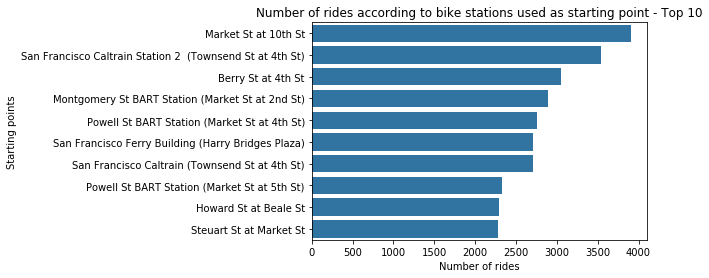

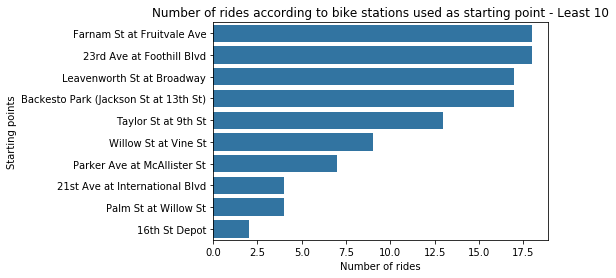

In [7]:
color = sb.color_palette()[0]
def plotFunc(plt):
    plt.xlabel('Number of rides')
    plt.ylabel('Starting points')
    plt.show()

order = bss.start_station_name.value_counts().head(10).index
sb.countplot(data = bss, y = 'start_station_name', color = color, order = order)
plt.title('Number of rides according to bike stations used as starting point - Top 10')
plotFunc(plt)
order = bss.start_station_name.value_counts().tail(10).index
sb.countplot(data = bss, y = 'start_station_name', color = color, order = order)
plt.title('Number of rides according to bike stations used as starting point - Least 10')
plotFunc(plt)

> **Distribution of bike-stations used in all rides** Which of the stations most commonly serve as users' destination? Which ones are least used?

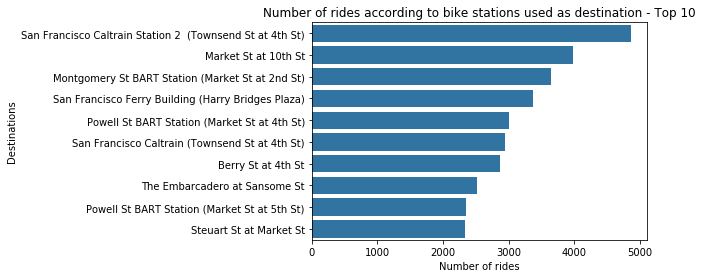

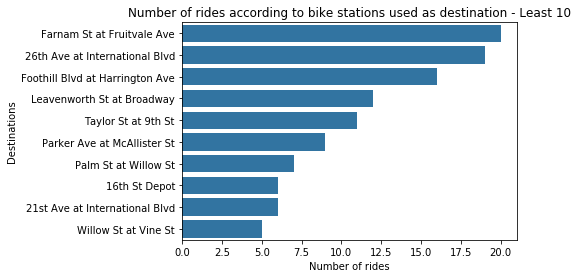

In [8]:
color = sb.color_palette()[0]
def plotFunc(plt):
    plt.xlabel('Number of rides')
    plt.ylabel('Destinations')
    plt.show()

order = bss.end_station_name.value_counts().head(10).index
sb.countplot(data = bss, y = 'end_station_name', color = color, order = order)
plt.title('Number of rides according to bike stations used as destination - Top 10')
plotFunc(plt)
order = bss.end_station_name.value_counts().tail(10).index
sb.countplot(data = bss, y = 'end_station_name', color = color, order = order)
plt.title('Number of rides according to bike stations used as destination - Least 10')
plotFunc(plt)

> **Distribution of users of the bike-sharing system** Are riders dominated by subscribers or customers?

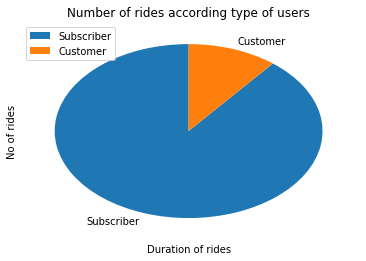

In [9]:
users = bss.user_type.value_counts()
plt.pie(users, labels = users.index, startangle = 90)
plt.title('Number of rides according type of users')
plt.xlabel('Duration of rides')
plt.ylabel('No of rides')
plt.legend()
plt.show()

> **Distribution of users of the bike-sharing system according to gender** Which gender group make use of the bike sharing system most?

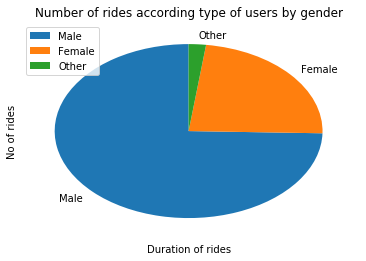

In [10]:
gender = bss.member_gender.value_counts()
plt.pie(gender, labels = gender.index, startangle = 90)
plt.title('Number of rides according type of users by gender')
plt.xlabel('Duration of rides')
plt.ylabel('No of rides')
plt.legend()
plt.show()

> **Distribution of users of the bike-sharing system according to age** Are the users mostly working class, leisurers or students trying to get to school?

In [11]:
#drop nul values and birth year should be an integer
bss.member_birth_year.dropna(inplace = True)

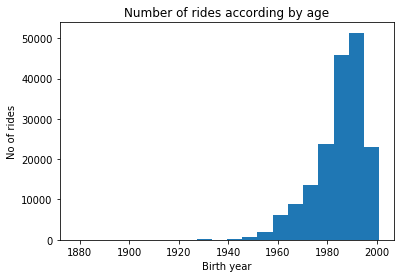

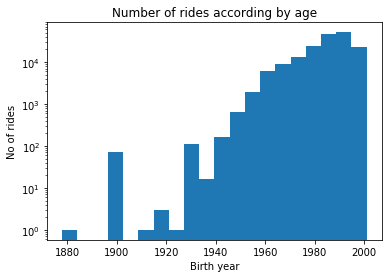

In [12]:
def plotFunc(plt):
    plt.title('Number of rides according by age')
    plt.xlabel('Birth year')
    plt.ylabel('No of rides')
    plt.show()
    
plt.hist(data = bss, x = 'member_birth_year', bins = 20)
plotFunc(plt)

#log scaling
plt.hist(data = bss, x = 'member_birth_year', bins = 20, log = True)
plotFunc(plt)

> **Distribution of bike_share_for_all_trips** What portion of all rides by inidvidual requires sharing?

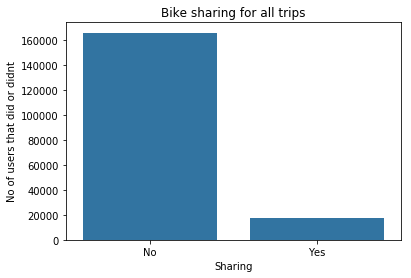

In [13]:
sb.countplot(data = bss, x = 'bike_share_for_all_trip', color = color)
plt.title('Bike sharing for all trips')
plt.xlabel('Sharing')
plt.ylabel('No of users that did or didnt')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Majority of the users are male. The users are prominently working class (around 1990), we've got a number of old people too. Very few users share their bikes during each journey which are usually fewer ten thousands sec. suggesting it isn't for really long distances.

> Some of the graphs had to be in logs to be able to observe all points of data. There are a lot of stations making it hard to have a general overview. Some null value had to be dropped before observing birth years and these too needed log scaling.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I tried not to do too much cleaning so that I can observe the entire shape of the data. The gender had some others in it with excluded null values. I had to drop the null values for the birth year as the plot functions wouldn't work if it 's not removed.

## Bivariate Exploration



> **Distribution between user categories and gender** We have seen that there are more male than female using the bike sharing system. Is there any difference in the percentage of user categories? Maybe the females are just customers and not subscribers.

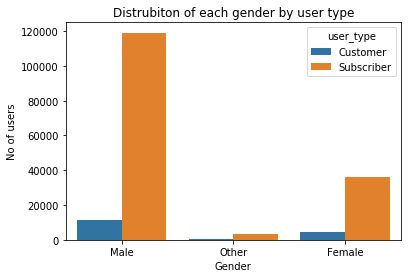

In [14]:
sb.countplot(data = bss, x = 'member_gender', hue = 'user_type')
plt.title('Distrubiton of each gender by user type')
plt.xlabel('Gender')
plt.ylabel('No of users')
plt.show()

> **Distribution between gender and age** We have seen the distribution of the age of the those that uses this system. Are they specific to certain gender?

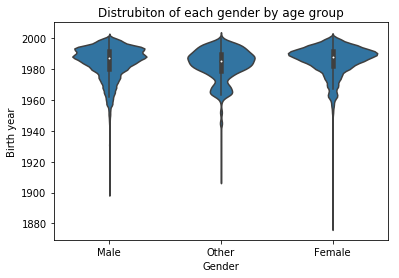

In [15]:
sb.violinplot(data = bss, x = 'member_gender',  y = 'member_birth_year', color = color)
plt.title('Distrubiton of each gender by age group')
plt.xlabel('Gender')
plt.ylabel('Birth year')
plt.show()

> **Realtionship between distance traveled and birth year of users of the bike-sharing system** Does age impact the distance travelled by each users? Is there any correlation? Try out a log scaling then a regplot to see if there is any trend in these two variables.

In [16]:
bss.dropna(inplace = True)

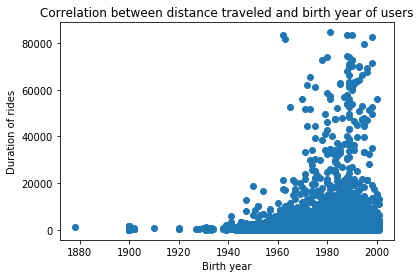

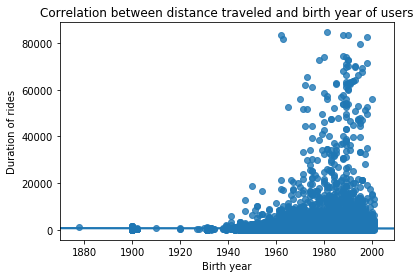

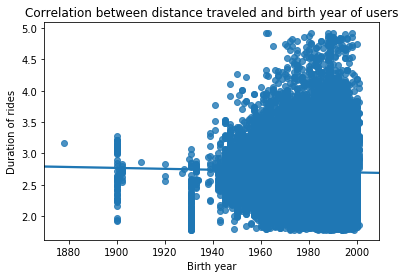

In [17]:
def plotFunc(plt):
    plt.title('Correlation between distance traveled and birth year of users')
    plt.xlabel('Birth year')
    plt.ylabel('Duration of rides')
    plt.show()


plt.scatter(data = bss, x = 'member_birth_year', y = 'duration_sec')
plotFunc(plt)

# regplot to show correlation

sb.regplot(data = bss, x = 'member_birth_year', y = 'duration_sec')
plotFunc(plt)

#regplot with log scaling

def log(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
sb.regplot(bss.member_birth_year, bss.duration_sec.apply(log))
plotFunc(plt)

> **Realtionship between user type and bike sharing** We know that users are either subscribers or customers. Are both categories able to share their bikes or not during a trip? and to what extent?

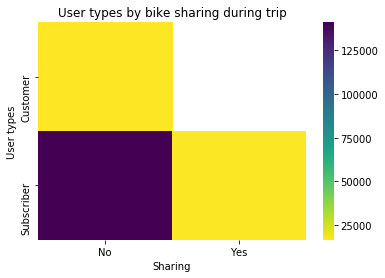

In [18]:
users = bss.groupby(['user_type', 'bike_share_for_all_trip']).size()
users = users.reset_index(name='count')
users = users.pivot(index = 'user_type', columns = 'bike_share_for_all_trip', values = 'count')
sb.heatmap(users, cmap = 'viridis_r')
plt.title('User types by bike sharing during trip')
plt.xlabel('Sharing')
plt.ylabel('User types')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There's an established majority of males using this system, however the variation between the subscribers and customers looked constant accross other categories. There is also a near equal distribution for the age groups too; they are majorly 1990s across the gender groups. Interestingly, there was no correlation between the distance traveled and the age of the users of the bike system. It has been show that majority of the users are subscribers; it's fun to have observed that either the customers didnt share their bikes on journeys or they just cant and only subscribers are able to do so.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Not really, I couldn't compare much as much of the data were in objects or floats.

## Multivariate Exploration



> **Duration travelled by user type and bike sharing** Majority of the users of this system are subscribers. Does this means they travel farther distance since they use it more often? Considering that customers cannot share bikes during a ride, do they travel shorter distances?

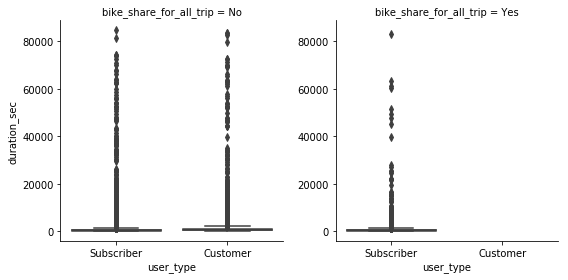

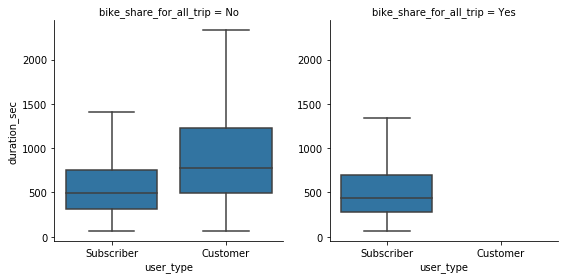

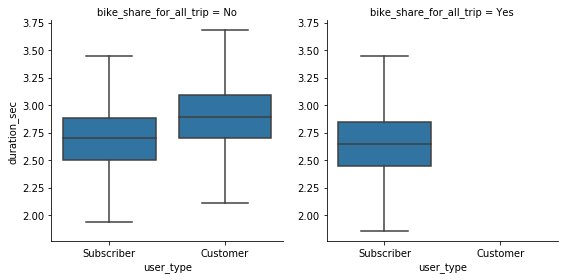

In [19]:
order = bss.user_type.value_counts().index
g = sb.FacetGrid(data = bss, col = 'bike_share_for_all_trip', size = 4)
g.map(sb.boxplot, 'user_type', 'duration_sec', order = order)
plt.show()

# remove outliers
g = sb.FacetGrid(data = bss, col = 'bike_share_for_all_trip', size = 4)
g.map(sb.boxplot, 'user_type', 'duration_sec', order = order, showfliers=False)
plt.show()

# apply log and remove outliers
bss.duration_sec = bss.duration_sec.apply(log)
g = sb.FacetGrid(data = bss, col = 'bike_share_for_all_trip', size = 4)
g.map(sb.boxplot, 'user_type', 'duration_sec', order = order, showfliers=False)
plt.show()

> **Take offs and destinations of areas covered** Let's take a look at the area IDs mostly covered by distance.

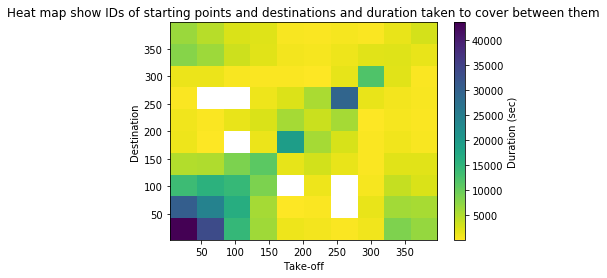

In [20]:
plt.hist2d(data = bss, x = 'start_station_id', y = 'end_station_id', weights = 'duration_sec', cmap = 'viridis_r', cmin = 0.5);
plt.title('Heat map show IDs of starting points and destinations and duration taken to cover between them')
plt.xlabel('Take-off')
plt.ylabel('Destination')
plt.colorbar(label = 'Duration (sec)')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It's clearer that customers did not have the capacity to share their bikes. Depending on our ability to discern the take off and destination IDs, we can tell how long it wil take us to travel from one area to another; this could be dependent on how busy some areas are too.


### Were there any interesting or surprising interactions between features?

> -